# 4/7/21 - G250289_2730 source mask

Working Directory has been set to `/data/sknabel/autoz_lens_model`
Today is 070421
GAMA ID?
LinKS ID?
Experiment #?
Shall we have a go?
Plotting white image


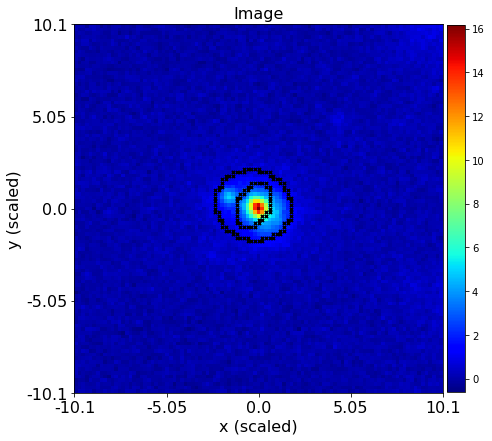

In [12]:
#!/usr/bin/env python
# coding: utf-8

# # 3/31/21

# ## Experiment 9 (White): phase1_nlive = 200, phase1_tolerance = 0.5, phase2_nlive = 300, phase2_tolerance = 0.5, phase3_nlive = 500, phase3_tolerance = 0.25, 4 Positions, Positions threshold = 1.0, use effective radius from GAMA DR3 Sersic Photometry catalog with sigma the observed error and upper limit (effective radius + error 1.3435+0.1146=1.4581), smaller mask (effective radius) centered at (0.075, -0.075), fix lens light bulge profile in second phase. Source R_E (0->10*lens.inensity)
# 
# ## Don't take the instance for the ellipticity and effective radius. Set same max effective radius


# In[5]:


### libraries
#get_ipython().run_line_magic('matplotlib', 'inline')
# set workspace path
from pyprojroot import here
workspace_path = str(here())#'/data/sknabel/autolens_workspace'
#get_ipython().run_line_magic('cd', '$workspace_path')
print(f"Working Directory has been set to `{workspace_path}`")

import matplotlib.pyplot as plt
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import pandas as pd
import numpy as np
from astropy.io import fits
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
#from astropy.stats import sigma_clip as clip
from os import path
import time

# set datetime variable
datetime = time.strftime("%d%m%y")
print(f'Today is {datetime}')
# paths
autoz_path = f'{workspace_path}/'
config_path = f'{here()}/config'
conf.instance.push(new_path=config_path)
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'


# In[6]:


gama_id = 250289
links_id = 2730

# set up for input
print('GAMA ID?')
#gama_id = int(input())
print('LinKS ID?')
#links_id = int(input())
print('Experiment #?')
#experiment_number = int(input())
print('Shall we have a go?')
#input()

object_folder = f'{fits_path}G{gama_id}_{links_id}/'
output_folder = f'{autoz_path}output/G{gama_id}_{links_id}/'

# load object data table
#links = pd.read_csv(f'{csv_path}/latest/links_sample_latest.csv')
#lens_galaxy_data = links[links.GAMA_ID == gama_id]
#zlens=lens_galaxy_data.zlens.values
#zsource=lens_galaxy_data.zsource.values
#einstein_radius=np.mean([lens_galaxy_data.theta_e_pm.values, lens_galaxy_data.theta_e_sis.values]) # take average of einstein radius estimates for prior
#print(f'Lens and source redshifts at {zlens} and {zsource}.')
#print(f'Einstein radius prior: {einstein_radius}')

# effective radius and error from DR3 sersic catalog
#hdul = fits.open(f'{fits_path}SersicCatSDSS.fits')
#hdul.verify('fix')
#data = hdul[1].data
#print(data.columns)
#print(data.CATAID)
#candidate = data[data.CATAID == gama_id]
#re_r = candidate.GALRE_r[0]
#re_r_err = candidate.GALREERR_r[0]
#re_g = candidate.GALRE_g[0]
#re_g_err = candidate.GALREERR_g[0]

# load r-band imaging
#imaging_r = al.Imaging.from_fits(image_path=path.join(object_folder, f'{links_id}_r_image.fits'),
#                             noise_map_path=path.join(object_folder, f'{links_id}_r_noise_map_image.fits'),
#                             psf_path=path.join(object_folder, f'{links_id}_r_psf_image.fits'),
 #                             pixel_scales=0.2)
#imaging_g = al.Imaging.from_fits(image_path=path.join(object_folder, f'{links_id}_g_image.fits'),
#                             noise_map_path=path.join(object_folder, f'{links_id}_g_noise_map_image.fits'),
#                             psf_path=path.join(object_folder, f'{links_id}_g_psf_image.fits'),
#                              pixel_scales=0.2)
imaging_white = al.Imaging.from_fits(image_path=path.join(object_folder, f'{links_id}_white_image.fits'),
                             noise_map_path=path.join(object_folder, f'{links_id}_white_noise_map_image.fits'),
                             psf_path=path.join(object_folder, f'{links_id}_white_psf_image.fits'),
                              pixel_scales=0.2)

# set up masks
#mask = al.Mask2D.from_fits(f'{object_folder}{links_id}_white_mask.fits', pixel_scales=imaging_r.pixel_scales)
#lens_mask = al.Mask2D.from_fits(f'{object_folder}{links_id}_r_lens_mask.fits', pixel_scales=imaging_r.pixel_scales)
source_mask = al.Mask2D.elliptical_annular(
    shape_native=imaging_white.shape_native, pixel_scales=imaging_white.pixel_scales, sub_size=2,# outer_radius=2.5, inner_radius=0.75,
    #centre=phase1_result.instance.galaxies.lens.bulge.centre
    centre=(0.2, -0.3),
    inner_major_axis_radius=1.2,
    inner_axis_ratio=0.6,
    inner_phi=60.0,
    outer_major_axis_radius=2.25,
    outer_axis_ratio=0.9,
    outer_phi=160.0,
)

# set white positions
#pos_white = np.genfromtxt(f'{object_folder}{links_id}_white_positions_grid.csv', delimiter=',', skip_header=0)
#imaging_white.positions = al.Grid2DIrregular(
#    [(pos_white[0]), (pos_white[1]), (pos_white[2]), (pos_white[3])]#, (pos[4]),]
#)

visuals_2d = aplt.Visuals2D(mask=source_mask)

# plot subplots for first view
print('Plotting white image')
imaging_plotter_white = aplt.ImagingPlotter( 
   imaging=imaging_white, visuals_2d=visuals_2d
)
imaging_plotter_white.figures(image=True)